In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

MANUALLY ANNOTATED SPEECHES - Available in HLS_man

| COP19        | COP20             | COP21             | COP22         | COP23       | COP24     | COP25     | COP26       | COP27       | COP28       |
|--------------|-------------------|-------------------|---------------|-------------|-----------|-----------|-------------|-------------|-------------|
| japan        | Holy see          | Trinidad & Tobago | Lao           | Netherlands | Malawi    | Serbia    | Russia      | Kazakhstan  | Belgium     |
| namibia      | kenya             | EU                | czechrepublic | Suriname    | Rwanda    | Cambodia  | Grenada     | Greece      | Gambia      |
| sierra leone | micronesia        | Nepal             | israel        | Vanatu      | Indonesia | Uganda    | Philippines | Australia   | Jamaica     |
| usa          | republic of korea | Afghanistan       | belize        | Croatia     | Macedonia | Mauritius | Slovakia    | Serbia      | New Zealand |
| timor leste  | tonga             | Bosnia Herz.      | thailand      | Ireland     | Lesotho   | Malaysia  | Barbados    | South Sudan | Jordan      |
|              | tonga_PSIDS       |                   |               |             |           |           |             |             |             |

## Analysis of V3 annotation codebook
Cleaning dataset, analysis of results, determination of final numerical labels.

Full datapreparation for application in GPT_annotate - preparing one-hot coded columns



In [2]:
#Directory path
path = 'HLS_man'

#List of items in folder
folder_items = os.listdir(path)

#Create filter for subdirectories
subfolders = [os.path.join(path, item) for item in folder_items if os.path.isdir(os.path.join(path, item))]
print(subfolders)

# Empty list to store dataframes
list = []

# Iterate over subdirectories
for subfolder in subfolders:
    for filename in os.listdir(subfolder):
        df = pd.read_excel(os.path.join(subfolder, filename))
        copID = df.columns[0]
        # add copID to dataframe
        df['id'] = copID
        # Rename first column containing ID
        df = df.rename(columns={df.columns[0]: 'Text'})
        # Add dataframe to list
        list.append(df)

HLS_df = pd.concat(list, ignore_index=True)

HLS_df

['HLS_man\\COP19', 'HLS_man\\COP20', 'HLS_man\\COP21', 'HLS_man\\COP22', 'HLS_man\\COP23', 'HLS_man\\COP24', 'HLS_man\\COP25', 'HLS_man\\COP26', 'HLS_man\\COP27', 'HLS_man\\COP28']


,Text,Relevance,Topic,Unit,Shape,Principle,30 word explanation,Notes,id
0,"\nThank you, Mr. President .",0,NaN,NaN,NaN,NaN,NaN,NaN,COP19_japan
1,"\n \nOn beha lf of the government of Japan , I...",0,NaN,NaN,NaN,NaN,NaN,NaN,COP19_japan
2,\n \nI would also like to expr ess my d eepest...,0,NaN,NaN,NaN,NaN,NaN,NaN,COP19_japan
3,\n \nMr. President: \n \nA fair and effective ...,2,new UNFCCC policy,responsibility,equality,utilitarian,"Motivation to reduce global emissions, need fo...",NaN,COP19_japan
4,"\n \nIn this regard, Japan firmly supports the...",1,NaN,NaN,NaN,NaN,NaN,NaN,COP19_japan
...,...,...,...,...,...,...,...,...,...
1538,\n \nNew Zealand is proud to suppor t several ...,0,NaN,NaN,NaN,NaN,NaN,NaN,COP28_newzealand
1539,"I am joined by New Zealand’s largest business,...",0,NaN,NaN,NaN,NaN,NaN,NaN,COP28_newzealand
1540,The commitment o f New Zealanders from across ...,0,NaN,NaN,NaN,NaN,NaN,NaN,COP28_newzealand
1541,\n \nThank you Mr President.,0,NaN,NaN,NaN,NaN,NaN,NaN,COP28_newzealand


In [3]:
# Remove '\n' from the 'Text' column
HLS_df['Text'] = HLS_df['Text'].str.replace('\n', '')

# Replace all nan values with 0
HLS_df = HLS_df.fillna(0)

# Alter order of columns
order = ['id', 'Text', 'Relevance', 'Principle' , 'Topic', 'Unit', 'Shape', '30 word explanation', 'Notes']
HLS_df = HLS_df[order]

HLS_df

,id,Text,Relevance,Principle,Topic,Unit,Shape,30 word explanation,Notes
0,COP19_japan,"Thank you, Mr. President .",0,0,0,0,0,0,0
1,COP19_japan,"On beha lf of the government of Japan , I wou...",0,0,0,0,0,0,0
2,COP19_japan,I would also like to expr ess my d eepest con...,0,0,0,0,0,0,0
3,COP19_japan,Mr. President: A fair and effective framewor...,2,utilitarian,new UNFCCC policy,responsibility,equality,"Motivation to reduce global emissions, need fo...",0
4,COP19_japan,"In this regard, Japan firmly supports the est...",1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1538,COP28_newzealand,New Zealand is proud to suppor t several impo...,0,0,0,0,0,0,0
1539,COP28_newzealand,"I am joined by New Zealand’s largest business,...",0,0,0,0,0,0,0
1540,COP28_newzealand,The commitment o f New Zealanders from across ...,0,0,0,0,0,0,0
1541,COP28_newzealand,Thank you Mr President.,0,0,0,0,0,0,0


In [4]:
# General information on dataframe
# 1. Nan counts
nan_counts = HLS_df.isna().sum()
print(nan_counts)

id                     0
Text                   0
Relevance              0
Principle              0
Topic                  0
Unit                   0
Shape                  0
30 word explanation    0
Notes                  0
dtype: int64


In [5]:
# Inspect notes column before removing
HLS_df[HLS_df["Notes"].notnull()]

,id,Text,Relevance,Principle,Topic,Unit,Shape,30 word explanation,Notes
0,COP19_japan,"Thank you, Mr. President .",0,0,0,0,0,0,0
1,COP19_japan,"On beha lf of the government of Japan , I wou...",0,0,0,0,0,0,0
2,COP19_japan,I would also like to expr ess my d eepest con...,0,0,0,0,0,0,0
3,COP19_japan,Mr. President: A fair and effective framewor...,2,utilitarian,new UNFCCC policy,responsibility,equality,"Motivation to reduce global emissions, need fo...",0
4,COP19_japan,"In this regard, Japan firmly supports the est...",1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1538,COP28_newzealand,New Zealand is proud to suppor t several impo...,0,0,0,0,0,0,0
1539,COP28_newzealand,"I am joined by New Zealand’s largest business,...",0,0,0,0,0,0,0
1540,COP28_newzealand,The commitment o f New Zealanders from across ...,0,0,0,0,0,0,0
1541,COP28_newzealand,Thank you Mr President.,0,0,0,0,0,0,0


Evaluation of notes columns - see also XLEXCEL: - clear alignmnent noted 13 times for 11 countries and 1 alliance
Alignment of statements with:
Sierra Leone: LDC, Africa Group, G77 and China, CRFN
Timor Leste: G77 and China, LDC, OASIS
Kenya: G77 and China, African Group
Micronesia: ASIS (Alliance of small island states)
Tonga: ASIS, G77 and China
PSIDS: ASIS
Bosnia Herz.: EU
Czech rep.: EU
Thailand: G77 and China
Ireland: EU
Mauritius: G77 and China, Africa group, Asis
Uganda: LDC, African Group, G77 and China.


In [6]:
# Drop notes column
HLS = HLS_df.drop(columns = ["Notes", "30 word explanation"])

Notes column is only used when wanting to evaluate the full reasoning used. This is available in the original dataset. For the current inspectation it is not of value.

In [7]:
# Determine number relevant sentences
relevance = HLS['Relevance'].value_counts()
relevance

0    999
1    277
2    267
Name: Relevance, dtype: int64

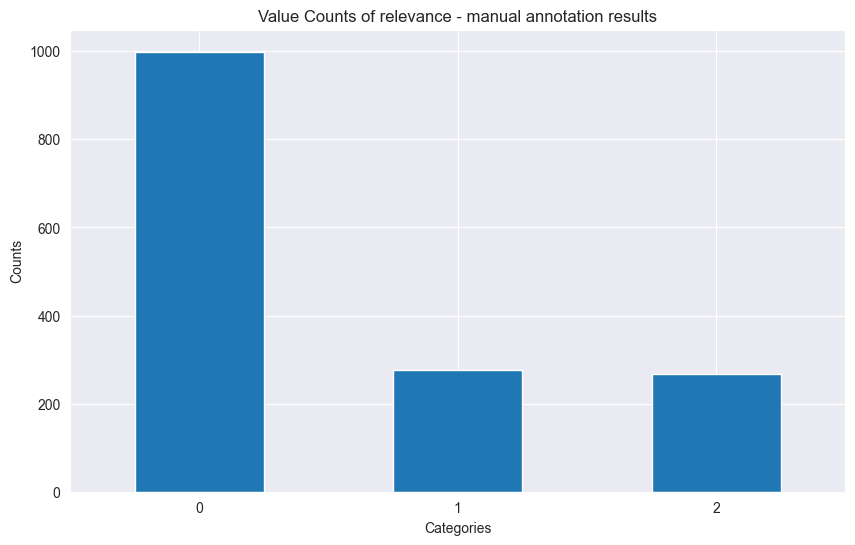

In [8]:
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
relevance.plot(kind='bar')
plt.title('Value Counts of relevance - manual annotation results')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()


The relevance is labeled numerically:
0 - not relevant
1 - statement of intent
2 - relevant

267 of the total of 1543 sentences are labelled as relevant (2). This is 17.3% of all sentences.

In [9]:
# Create new dataframe only containing the sentences deemed relevant
HLS_relevant = HLS[(HLS['Relevance']==2)]

# Inspect dataframe
HLS_relevant

,id,Text,Relevance,Principle,Topic,Unit,Shape
3,COP19_japan,Mr. President: A fair and effective framewor...,2,utilitarian,new UNFCCC policy,responsibility,equality
5,COP19_japan,Such a framework must be based on “nationally ...,2,egalitarian,new UNFCCC policy,responsibility,equity
44,COP19_namibia,It should not only enable us to discuss global...,2,utilitarian,new UNFCCC policy,n.a.,n.a.
53,COP19_namibia,Global warming is a catastrophic problem that ...,2,utilitarian,urgency,n.a.,n.a.
54,COP19_namibia,"Therefore, the multilateralism approach remain...",2,general normative statement,new UNFCCC policy,n.a.,n.a.
...,...,...,...,...,...,...,...
1503,COP28_jordan,As we work to catch up on lost time and progr...,2,prioritarian,urgency,n.a.,n.a.
1504,COP28_jordan,"Conflict -ridden communities, refugees, and d...",2,prioritarian,new UNFCC policy,n.a.,n.a.
1505,COP28_jordan,"Nor can we stand by , as the massive destructi...",2,utilitarian,moral responsiblity,n.a.,n.a.
1529,COP28_newzealand,We recognise that we must deliver on our coll...,2,prioritarian,financial mechanisms,financial resources,proportional to commitment


#### Evaluation of Principles
First, account for spelling mistakes made during annotation. After this pre-processing evaluate principle use.

In [10]:
# Inspect principle column - evaluating total principle use
HLS_relevant['Principle'].value_counts()

utilitarian                    62
prioritarian                   62
egalitarian                    56
general normative statement    47
sufficientarian                10
prioritarian                    5
egalitarain                     4
libertarian                     3
egalitarian                     3
general normative statemetn     2
egalitarianism                  2
prioritarain                    2
utilitarian                     2
libertarian                     1
prioritatiran                   1
proioritarian                   1
utilitarianism                  1
proritarian                     1
egalitararin                    1
Egalitarian                     1
Name: Principle, dtype: int64

In [11]:
HLS_spelling = HLS_relevant.copy()

# Fix spelling mistakes
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('prioritatiran', 'prioritarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('proioritarian', 'prioritarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('prioritarian ', 'prioritarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('prioritarain', 'prioritarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('proritarian', 'prioritarian')

HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('Egalitarian', 'egalitarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('egalitararin', 'egalitarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('egalitarian ', 'egalitarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('egalitarianism', 'egalitarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('egalitarain', 'egalitarian')

HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('utilitarianism', 'utilitarian')
HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('utilitarian ', 'utilitarian')

HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('libertarian ', 'libertarian')

HLS_spelling.loc[:,'Principle'] = HLS_spelling['Principle'].str.replace('general normative statemetn', 'general normative statement')

# Evaluate final number of principle labels
principle_count = HLS_spelling['Principle'].value_counts()

principle_count

prioritarian                   72
egalitarian                    67
utilitarian                    65
general normative statement    49
sufficientarian                10
libertarian                     4
Name: Principle, dtype: int64

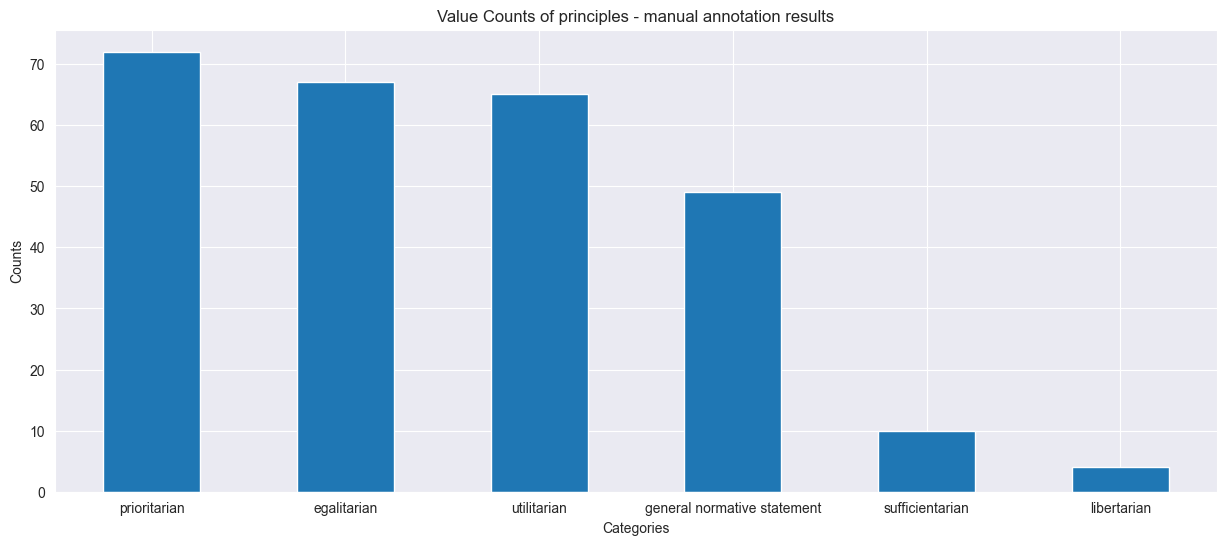

In [39]:
# Plotting using Matplotlib
plt.figure(figsize=(15, 6))
principle_count.plot(kind='bar')
plt.title('Value Counts of principles - manual annotation results')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.xticks(rotation=0)
plt.show()

Sufficientarian and libertarian are less often found. Libertarian in such a limited number that preferably would have a larger number of available samples.

The random split used for the testing  of the data should include sufficientarian labels in both. Thus: inspect the sentences labelled as libertarian.
Libertarian principles are found in:
COP19_usa
COP23_netherlands
COP24_rwanda
COP28_belgium

Test dataset will include: COP19_usa and COP28_belgium

This is done to account for the class imbalance presented in the main category; the principles.

Important: also check if sufficientarian is represented in the dataset.

In [13]:
libertarian = HLS_spelling[HLS_spelling['Principle']== 'libertarian']
libertarian

,id,Text,Relevance,Principle,Topic,Unit,Shape
157,COP19_usa,"• By contrast, an agreement based on 1992 cat...",2,libertarian,UNFCCC agreements and principles,n.a.,n.a.
737,COP23_netherlands,We should make the most of these opportunities...,2,libertarian,implementation,n.a.,n.a.
915,COP24_rwanda,1 The Paris Agreement Work Programme should...,2,libertarian,new UNFCCC policy,n.a.,n.a.
1386,COP28_belgium,In Europe we need to create the right incenti...,2,libertarian,implementation,financial resources,n.a.


In [14]:
sufficientarian = HLS_spelling[HLS_spelling['Principle']== 'sufficientarian']
sufficientarian

,id,Text,Relevance,Principle,Topic,Unit,Shape
58,COP19_namibia,As a country committed to address the adverse ...,2,sufficientarian,mitigation,"financial resources, technological resources",needs-based
98,COP19_sierra_leone,"Mr. President, Sierra Leone submits that adapt...",2,sufficientarian,"adaptation, mitigation",n.a.,n.a.
169,COP20_holy_sea,"The longer we wait, the more it will cost; mor...",2,sufficientarian,urgency,n.a.,n.a.
275,COP20_republicofkorea,"First, our conversation on the new agreement...",2,sufficientarian,new UNFCCC policy,n.a.,needs based
302,COP20_tonga,"Yet, in light of our limited human resources, ...",2,sufficientarian,human rights,n.a.,n.a.
470,COP21_trinidad_and_tobago,It must carry forward the spirit of the new gl...,2,sufficientarian,new UNFCCC policy,responsibility,needs based
686,COP23_ireland,I firmly believe that COP23 is not just about...,2,sufficientarian,UNFCCC agreements and policies,n.a.,n.a.
710,COP23_ireland,We must share our experiences along with ensur...,2,sufficientarian,support mechanism,resources,needs based
1122,COP26_grenada,We acknowledge that the transformation that is...,2,sufficientarian,transformation,n.a.,n.a.
1329,COP27_serbia,• We must not forget that transition to a low ...,2,sufficientarian,societal change,n.a.,n.a.


#### Evaluation of Topics

In [15]:
# Inspect topic column - evaluating topic types and use
topic_count = HLS_spelling['Topic'].value_counts()


Evaluate if this topic notion is the most valuable. Only address a limited number of coded topics:
TOPIC
0 not evaluated
1 new UNFCCC policy
2 UNFCCC agreements and principles
3 urgency
4 cooperation
5 financial mechanisms
6 adaptation
7 mitigation
8 adaptation and mitigation
9 other

Vraag: hoe groot is de "other" group? > bepaal later, ook rekening houden met spelfouten

### Evaluation of Unit

In [16]:
HLS_spelling['Unit'].value_counts()

n.a.                                            121
responsibility                                   57
financial resources                              38
support                                          20
financial resources, technological resources      6
financial resources, technical resources          2
responsibiltiy                                    2
emissions                                         2
technological resources                           2
responsibiliy                                     1
responsiblity                                     1
financial resources                               1
commitments                                       1
support                                           1
technological resources, financial resources      1
responsibililty                                   1
financial resources, technologcal resources       1
emission targets                                  1
technological resource                            1
responsibili

1. responsibility
2. financial resources
3. technical resources (AANPASSEN!)
4. financial resources, technological resources
5. support
5. other
6. n.a.

> aanpassen opties; selectie van deze units in bepaalde opzichten opvallend omdat dit dus de verdelingen zijn die het meeste worden aangeroepen in de speeches.
> In FW - niet werken met gestandariseerde codes maar volledig bottom-up werken (als gebruik van LLM, anders te moeilijk). Waarom? je verliest nu juist de kleine voorbeelden.
> Verklaren waarom dit de meest belangrijke units zijn; is global negotiation, dus meestal niet specified - niet handig om direct een unit te geven. Resources en support zijn een basic unit van verdeling. Vaak is de verdeling implicieter, dus geen unit genoemd. Belangrijk is wel dat het ook gaat over responsiblity; gelinkt aan procedural justice
>
> ##oude notes!!!


### Evaluation of Shape

In [17]:
HLS_spelling['Shape'].value_counts()

n.a.                             152
priority to worst off             37
equality                          17
proportional to commitments       17
equity                            17
needs based                        7
proportional to contribution       4
n.a.                               4
priorty to worst off               2
0                                  2
proportial to contribution         2
equity                             1
needs-based                        1
n.a                                1
proportional to contributions      1
prioportional to commitments       1
proportional to commitment         1
Name: Shape, dtype: int64

1. n.a.
2. priority to worst off
3. equality
4. proportional to commitments
5. equity
6. needs based
7. proportional to contribution

7 categories of distribution shapes, deze wel er allemaal inhouden, met observatie dat verschil tussen equity and priority to worst of goed duidelijk gemaakt moet worden.

> Belangrijk FW: gebruik van labelling software voor categories, voorkomt spelfouten die er later nog uitgehaald moeten worden.

> label 0 gebruiken voor "niet gelabeled" - zo onderscheid houden
> hoe ga je data visualiseren??


## Conversion of full dataframe to numerical values
Relevance is already labelled as numerical values.
All nan values are replaces with 0. In all columns, exept relevance, this indicates that the label is not evaluated.

In [18]:
# Fix spelling mistakes in original dataframe
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('prioritatiran', 'prioritarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('proioritarian', 'prioritarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('prioritarian ', 'prioritarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('prioritarain', 'prioritarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('proritarian', 'prioritarian')

HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('Egalitarian', 'egalitarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('egalitararin', 'egalitarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('egalitarian ', 'egalitarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('egalitarianism', 'egalitarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('egalitarain', 'egalitarian')

HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('utilitarianism', 'utilitarian')
HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('utilitarian ', 'utilitarian')

HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('libertarian ', 'libertarian')

HLS.loc[:,'Principle'] = HLS['Principle'].str.replace('general normative statemetn', 'general normative statement')


### Convert principles to numerical:
0 not evaluated
1 general normative statement
2 egalitarian
3 utilitarian
4 prioritarian
5 sufficientarian
6 libertarian


In [19]:
# Principles
HLS['Principle'] = HLS['Principle'].replace('general normative statement',1)
HLS['Principle'] = HLS['Principle'].replace('egalitarian',2)
HLS['Principle'] = HLS['Principle'].replace('utilitarian',3)
HLS['Principle'] = HLS['Principle'].replace('prioritarian',4)
HLS['Principle'] = HLS['Principle'].replace('sufficientarian',5)
HLS['Principle'] = HLS['Principle'].replace('libertarian',6)

HLS['Principle'] = HLS['Principle'].fillna(0)

### Convert topics to numerical:
List determined based on occurences.
0 not evaluated
1 new UNFCCC policy
2 UNFCCC agreements and principles
3 urgency
4 cooperation
5 financial mechanisms
6 adaptation
7 mitigation
8 adaptation and mitigation
9 other

Note: the notion of Green Climate Fund (GCF) is evaluated as a financial mechanisms.
with every category converted, all remaining strings are set to 9; other.

In [20]:
replace1 = {'new UNFCCC policy':1,'new UNFCCC policy ':1, 'new UNFCCC policies':1,'New UNFCCC policy':1, ' new UNFCCC policy':1,'new UNFCCC policy ':1, 'new UNFCC policy ':1}
replace2 = {'UNFCCC agreements and principles':2,'UNFCCC agreements and principles ':2,'UNFCCC argreements and principles':2, 'UNFCCC agreements and policies':2}

HLS['Topic'] = HLS['Topic'].replace(replace1)
HLS['Topic'] = HLS['Topic'].replace(replace2)
HLS['Topic'] = HLS['Topic'].replace('urgency',3)
HLS['Topic'] = HLS['Topic'].replace('cooperation',4)
HLS['Topic'] = HLS['Topic'].replace({'financial mechanisms':5,'GCF':5, 'financial mechanism':5})
HLS['Topic'] = HLS['Topic'].replace('adaptation',6)
HLS['Topic'] = HLS['Topic'].replace({'mitigation':7, 'mitigation ':7})
HLS['Topic'] = HLS['Topic'].replace('adaptation, mitigation',8)

# Evaluate how much is converted now
HLS['Topic'].value_counts()


0                              1273
1                                52
2                                41
3                                40
5                                29
4                                27
8                                11
implementation                    8
7                                 7
loss and damage                   7
commitment                        7
moral responsibility              7
societal issues                   4
education                         3
support mechanism                 3
6                                 2
discrimination                    2
nature protection                 2
gender equality                   2
energy transformation             1
energy equilibrium                1
commitments                       1
societal change                   1
leadership                        1
climate impact                    1
transformation                    1
redistribution of resources       1
climate justice             

There are A LOT of topic categories. This is because of the high topic density of COP speeches. Focus on the main topics that are deemed most relevant, especially the mitigation and adaptation. Can always be removed if deemed necessary.



In [21]:
#Label all non-numerical rows as 9
HLS['Topic'] = HLS['Topic'].apply(lambda x: 9 if isinstance(x, str) else x)

### Converting Units to numerical
0 not evaluated
1 not indicated
2 responsibility
3 financial resources
4 technological resources
5 financial and technological resources
6 support
7 other

In [22]:
HLS['Unit'] = HLS['Unit'].replace({'n.a.':1, 'n.a. ':1})
HLS['Unit'] = HLS['Unit'].replace({'responsibility':2,'responsibiliy':2,'responsibilty':2,
                                   'responsiblity':2, 'responsibililty':2, 'responsibilties':2,'responsibilities ':2, 'responsibiltiy':2})
HLS['Unit'] = HLS['Unit'].replace({'financial resources':3, 'financial resources ':3})
HLS['Unit'] = HLS['Unit'].replace({'technological resources':4, 'technological resource':4, 'technical resources':4})
HLS['Unit'] = HLS['Unit'].replace({'financial resources, technological resources':5, 'financial resources, technologcal resources':5,
                                   'technological resources, financial resources':5, 'financial resources, technical resources':5})
HLS['Unit'] = HLS['Unit'].replace({'support':6, ' support':6, 'support ':6})

HLS['Unit'].value_counts()

0                   1273
1                    124
2                     64
3                     40
6                     21
5                     10
4                      4
emissions              2
costs                  1
emission targets       1
contribution           1
resources              1
commitments            1
Name: Unit, dtype: int64

In [23]:
# Label final, not categorical labels as 7
HLS['Unit'] = HLS['Unit'].apply(lambda x: 7 if isinstance(x, str) else x)

### Converting Shape into numerical
0 not evaluated
1 not indicated
2 equality
3 equity
4 priority to worst off
5 needs based
6 proportional to contribution
7 proportional to commitments
8 other (not in original dataset - potentially removed to limit confusion?)

In [24]:
HLS['Shape'] = HLS['Shape'].replace({'n.a.':1,'n.a.  ':1, 'n.a':1})
HLS['Shape'] = HLS['Shape'].replace('equality',2)
HLS['Shape'] = HLS['Shape'].replace({'equity':3, 'equity ':3})
HLS['Shape'] = HLS['Shape'].replace({'priority to worst off':4, 'priorty to worst off':4})
HLS['Shape'] = HLS['Shape'].replace({'needs based':5, 'needs-based':5})
HLS['Shape'] = HLS['Shape'].replace({'proportional to contribution':6, 'proportial to contribution':6, 'proportional to contributions':6})
HLS['Shape'] = HLS['Shape'].replace({'proportional to commitments':7, 'prioportional to commitments':7, 'proportional to commitment':7})

HLS['Shape'].value_counts()

0    1275
1     159
4      39
7      20
3      18
2      17
5       8
6       7
Name: Shape, dtype: int64

In [25]:
#Set all label columns to integers
HLS["Principle"] = HLS["Principle"].astype(int)
HLS["Unit"] = HLS["Unit"].astype(int)

# Save full numerical dataset to an excel file
HLS.to_excel('HLS_man/HLS_complete.xlsx')

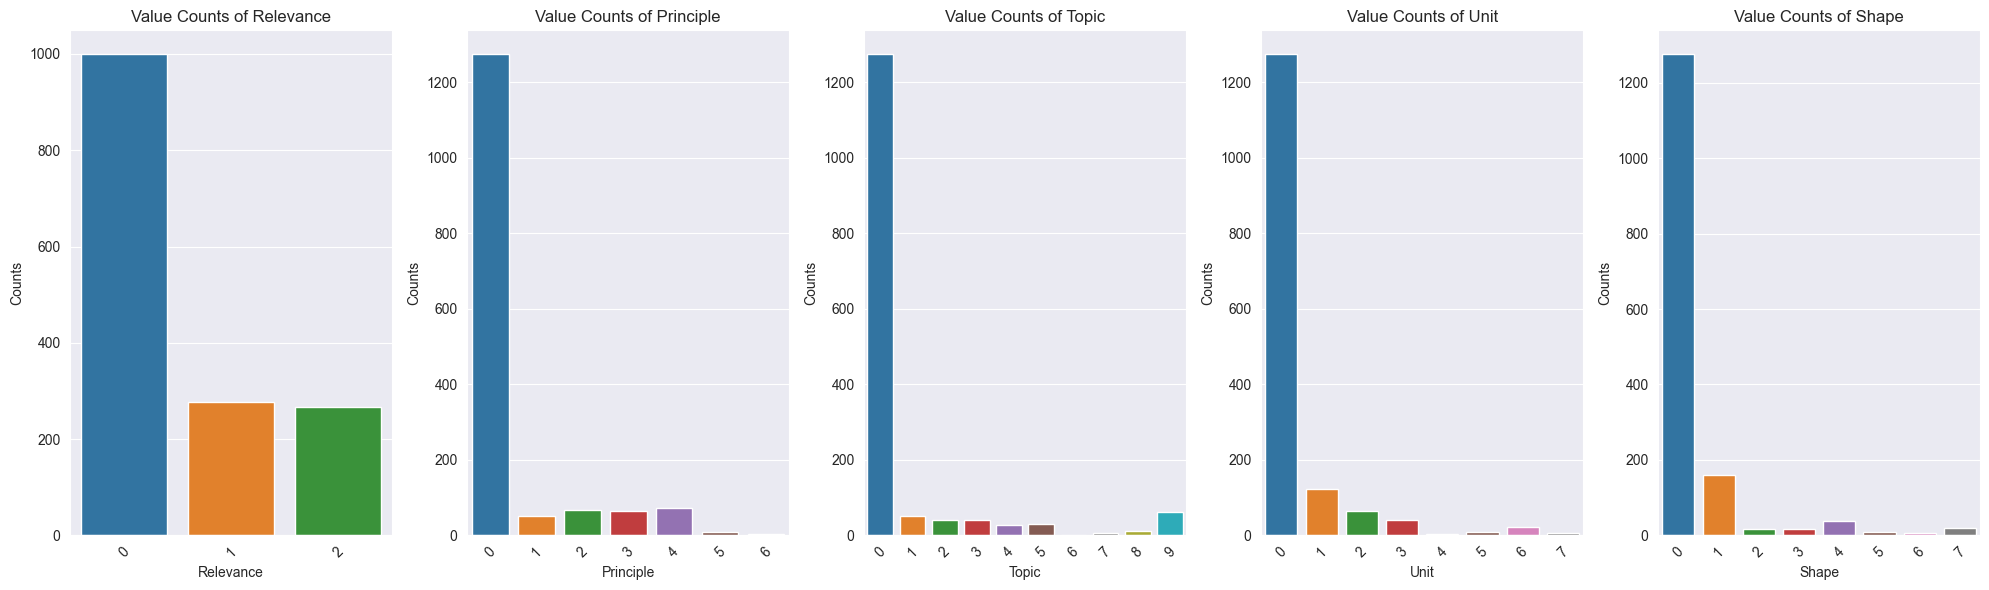

In [26]:
# List of columns to plot
columns_to_plot = ['Relevance', 'Principle', 'Topic', 'Unit', 'Shape']

# Set up the plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 6))

# Loop through each column and create a bar plot
for ax, column in zip(axes, columns_to_plot):
    value_counts = HLS[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.set_title(f'Value Counts of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

In [27]:
# Select only relevant elements of the plot
HLS_R2 = HLS[(HLS['Relevance']==2)]
HLS_R2[(HLS_R2['Shape']==0)]

,id,Text,Relevance,Principle,Topic,Unit,Shape
134,COP19_timor_leste,"Lastly, Mr. President,Regarding 2015 agreement...",2,1,3,1,0
187,COP20_holy_sea,If we remain inactive in addressing climate ch...,2,2,2,2,0


Oke dit moet ik eigenlijk wel aanpassen.

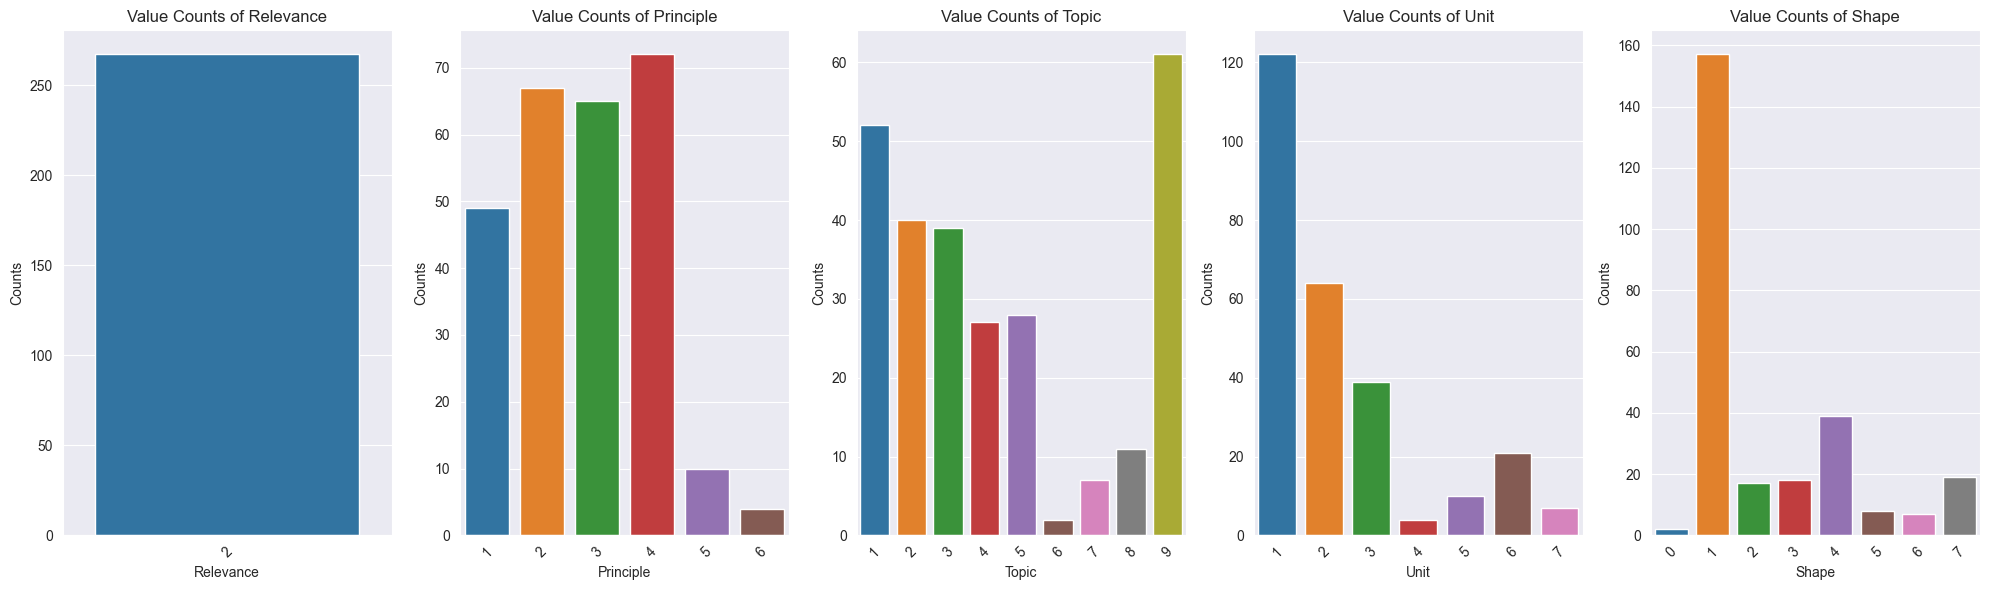

In [28]:
# List of columns to plot
columns_to_plot = ['Relevance', 'Principle', 'Topic', 'Unit', 'Shape']

# Set up the plot grid
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(20, 6))

# Loop through each column and create a bar plot
for ax, column in zip(axes, columns_to_plot):
    value_counts = HLS_R2[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax)
    ax.set_title(f'Value Counts of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Counts')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Visualise the occurences of each category in a bar plot in a bar plot.

All shapes have been converted. Now the final data split has to be made. This is done on a 80/20 basis. Selecting 41 documents for evaluation and potential updating of the codebook. The final codebook is evaluated on 10 documents to prevent overfitting.
It is important to have some categorical balance between the dataset. In this case indicating that all labels have to occur at least once.

-- Eigenlijk nog evalueren van stats per speech?

To start, one speech of all cops are selected.
COP19_usa
COP20_micronesia
COP21_nepal
COP22_belize
COP23_ireland
COP24_rwanda
COP25_serbia
COP26_barbados
COP27_kazakhstan
COP28_belgium

> belangrijk: je evalueert in principe per speech, dus je kan niet gewoon op een aantal losse rows selecteren.

In [29]:
testset = ['COP19_usa', 'COP20_micronesia', 'COP21_nepal','COP22_belize','COP23_ireland', 'COP24_rwanda','COP25_serbia','COP26_barbados', 'COP27_kazakhstan','COP28_belgium']
HLS_test = HLS[HLS['id'].isin(testset)]
HLS_test

,id,Text,Relevance,Principle,Topic,Unit,Shape
141,COP19_usa, The U.S. has led the way in the relief effo...,0,0,0,0,0
142,COP19_usa,"Inthe past 10 years, the U.S. has contributed ...",0,0,0,0,0
143,COP19_usa," Of course, scientists dont know that clima...",0,0,0,0,0
144,COP19_usa, It is for this reason that President Obama ...,0,0,0,0,0
145,COP19_usa," Last June, President Obama announced the U....",0,0,0,0,0
...,...,...,...,...,...,...,...
1397,COP28_belgium,The most important result of COP28 that I wou...,1,0,0,0,0
1398,COP28_belgium,"Trust that “WE” , governments together with o...",1,0,0,0,0
1399,COP28_belgium,,0,0,0,0,0
1400,COP28_belgium,"But for that, we need….to scale up the solutio...",1,1,3,1,1


HLS_test contains 331 rows, this is 21% of the total number of rows. Check other statistics:
15% of the sentences are relevant. This is slightly less than the original (17.3%)

In [30]:
HLS_test['Relevance'].value_counts()

0    213
1     69
2     49
Name: Relevance, dtype: int64

In [31]:
HLS_test['Principle'].value_counts()

0    281
1     17
2     16
3      6
4      6
6      3
5      2
Name: Principle, dtype: int64

In [32]:
HLS_test['Topic'].value_counts() #CURRENTLY NO 6 7 8 - is that a bad thing?

0    281
9     15
1     11
2      9
5      7
4      4
3      4
Name: Topic, dtype: int64

In [33]:
HLS_test['Unit'].value_counts() #CURRENTLY NO 8, is deemed fine

0    281
1     18
2     15
3      9
7      3
6      2
5      2
4      1
Name: Unit, dtype: int64

In [34]:
HLS_test['Shape'].value_counts() # No shape 8 - other, which was also not found in the original dataset

0    281
1     29
2      6
4      5
3      4
5      3
6      2
7      1
Name: Shape, dtype: int64

In [35]:
# Create train dataset
HLS_train = HLS[~HLS['id'].isin(testset)]

# Save both datasets as csv files in the HLS_man folder
HLS_test.to_csv('HLS_man/HLS_test.csv')
HLS_train.to_csv('HLS_man/HLS_train.csv')

HLS_train

,id,Text,Relevance,Principle,Topic,Unit,Shape
0,COP19_japan,"Thank you, Mr. President .",0,0,0,0,0
1,COP19_japan,"On beha lf of the government of Japan , I wou...",0,0,0,0,0
2,COP19_japan,I would also like to expr ess my d eepest con...,0,0,0,0,0
3,COP19_japan,Mr. President: A fair and effective framewor...,2,3,1,2,2
4,COP19_japan,"In this regard, Japan firmly supports the est...",1,0,0,0,0
...,...,...,...,...,...,...,...
1538,COP28_newzealand,New Zealand is proud to suppor t several impo...,0,0,0,0,0
1539,COP28_newzealand,"I am joined by New Zealand’s largest business,...",0,0,0,0,0
1540,COP28_newzealand,The commitment o f New Zealanders from across ...,0,0,0,0,0
1541,COP28_newzealand,Thank you Mr President.,0,0,0,0,0


## Get dummies?
If neccesssary; use get.dummies to create dummies dataframe. > implies need to change the codebook: slight change in formulation. Still able to address everything as the datasets are presented.

Dummies created in original HLS, then again split and saved for test and train.

In [36]:
HLS_dummies = HLS[['id', 'Text']]

# Create dummies for categorical values - TEST SET
HLS_dummies_relevance = pd.get_dummies(HLS['Relevance'], columns=['Relevance'], prefix= 'relevance')
HLS_dummies_principle = pd.get_dummies(HLS['Principle'], columns=['Principle'], prefix='principle')
HLS_dummies_topic = pd.get_dummies(HLS['Topic'], columns=['Topic'], prefix='topic')
HLS_dummies_unit = pd.get_dummies(HLS['Unit'], columns=['Unit'], prefix='unit')
HLS_dummies_shape = pd.get_dummies(HLS['Shape'], columns=['Shape'], prefix='shape')

# Merge the dummies dataframes
HLS_dummies = pd.concat([HLS_dummies, HLS_dummies_relevance, HLS_dummies_principle, HLS_dummies_topic, HLS_dummies_unit, HLS_dummies_shape], axis=1)
# Add shape_8 column to HLS_dummies to indicate the 'other' category of shapes
HLS_dummies['shape_8']=0
HLS_dummies

,id,Text,relevance_0,relevance_1,relevance_2,principle_0,principle_1,principle_2,principle_3,principle_4,...,unit_7,shape_0,shape_1,shape_2,shape_3,shape_4,shape_5,shape_6,shape_7,shape_8
0,COP19_japan,"Thank you, Mr. President .",1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,COP19_japan,"On beha lf of the government of Japan , I wou...",1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,COP19_japan,I would also like to expr ess my d eepest con...,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,COP19_japan,Mr. President: A fair and effective framewor...,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,COP19_japan,"In this regard, Japan firmly supports the est...",0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,COP28_newzealand,New Zealand is proud to suppor t several impo...,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1539,COP28_newzealand,"I am joined by New Zealand’s largest business,...",1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1540,COP28_newzealand,The commitment o f New Zealanders from across ...,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1541,COP28_newzealand,Thank you Mr President.,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [37]:
#Split into the same test and train data
test_dummies = HLS_dummies[HLS_dummies['id'].isin(testset)]
train_dummies = HLS_dummies[~HLS_dummies['id'].isin(testset)]

In [38]:
# Save both datasets as csv files in the HLS_man folder
test_dummies.to_csv('HLS_man/HLS_test_dummies.csv', index=False)
train_dummies.to_csv('HLS_man/HLS_train_dummies.csv', index=False)